In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
pd.set_option("display.precision", 8)


def remove_nan(data):
    """
    remove thw NaN values from the dataset
    isnull() detects NaN value and marks them with True. 
    any() detects True values and returns a list
    """
    #find out indeces with NaN values and drop them
    index_with_nan = data.index[data.isnull().any(axis=1)]
    data.drop(index_with_nan,0, inplace=True)
    data.to_csv('data witout NaN.csv',index = False)
    data = pd.read_csv("data witout NaN.csv")
    return data

def seperate(data,file_name, *column):
    """
    seperate values from the dataset and save the values into csv file
    """
    x = data.loc[:,['ref_id', *column]]
    x.to_csv(file_name,index = False)
    return x

def create(data,name):
    '''
    pick out the 8 columns in data
    '''
    output = data.loc[:,[name+'1',name+'2',name+'3',name+'4',name+'5',
                         name+'6',name+'7',name+'8']].astype(np.int64)
    return output

def rearrange(data,portion_id,name):
    '''
    rearrange the rsrp values baesed the order of portion_id
    '''
    #create an all-zero dataframe
    pre = create(data, name)
    after = pd.DataFrame(np.zeros(np.shape(pre)), columns = [[name+'1',name+'2',name+'3',name+'4',name+'5',
                                                                    name+'6',name+'7',name+'8']]).astype(np.int64)
    #run the loop to rearrange
    for i in range(len(after)):
        for j in range(len(portion_id.loc[i])):
            # the num-th is 'after' is the j-th in 'pre'
            num = portion_id.iloc[i,j]
            after.iat[i,num] = pre.iat[i,j]
    after.to_csv(name+'.csv',index = False)
    return after

In [26]:
#19.++ is longitude ,47.++ are latitude
data = pd.read_csv("walktest_results0423.csv")
data = remove_nan(data)
gps = seperate(data,'gps.csv','ref_x','ref_y')
print("After removing NaN values, the number of ref_id is %d. " %gps.value_counts().count())
print("Also, the number of gps measurement points is %d. " %gps['ref_x'].value_counts().count())

# seperate the single columns and leave the repeated ones,such as rsrp, portion_id.
LoS = seperate(data, 'LoS.csv', 'LoS/nLos')
ue_setting = seperate(data, 'ue_setting.csv','ue_setting' )
direction = seperate(data, 'direction.csv', 'direction')
distance = seperate(data, 'distance.csv','distance' )
req_ue_id = seperate(data, 'req_ue_id.csv', 'req_ue_id')
resp_date = seperate(data, 'resp_date.csv', 'resp_date')
ECI = seperate(data, 'ECI.csv', 'ECI')

#convert 5,6,7,8,21,22,23,24 to 0,1,2,3,4,5,6,7
#portion_id is the checking list
portion_id = create(data,'cell-Portion-ID').replace([5,6,7,8,21,22,23,24],[0,1,2,3,4,5,6,7])
rsrp = rearrange(data,portion_id,'rds-SRSRP')
sector = rearrange(data,portion_id,'sector')

After removing NaN values, the number of ref_id is 149. 
Also, the number of gps measurement points is 143. 


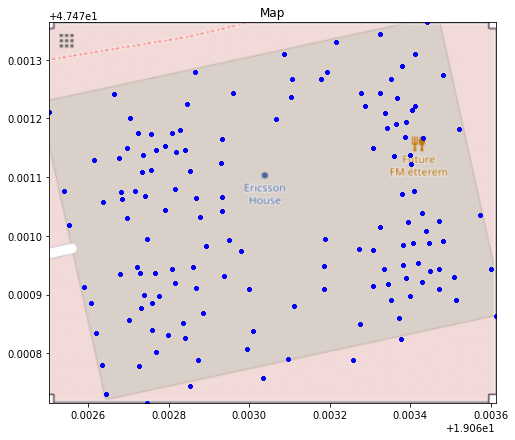

In [27]:
BBox = ((gps.ref_y.min(),   gps.ref_y.max(),      
         gps.ref_x.min(), gps.ref_x.max()))
amap = plt.imread('Capture.png')
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(gps.ref_y, gps.ref_x, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Map')
ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])
ax.imshow(amap, zorder=0, extent = BBox, aspect= 'auto')